بسم الله

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/hjsjdjdjdjd/Apple 2009-2024.csv')

df.head()

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,"$134,661","$391,035","$180,683","$123,216","$93,736",$6.08,"15,408",243.0400,"$364,980","$65,171","$85,750","$308,030",46.21%,39.97,"164,000"
1,2023,"$125,820","$383,285","$169,148","$114,301","$96,995",$6.13,"15,813",191.5919,"$352,583","$61,555","$95,281","$290,437",45.03%,29.84,"161,000"
2,2022,"$130,541","$394,328","$170,782","$119,437","$99,803",$6.11,"16,326",128.5816,"$352,755","$48,304","$98,959","$302,083",43.06%,21.83,"164,000"
3,2021,"$120,233","$365,817","$152,836","$108,949","$94,680",$5.61,"16,865",174.7132,"$351,002","$62,639","$109,106","$287,912",43.02%,28.93,"154,000"
4,2020,"$77,344","$274,515","$104,956","$66,288","$57,411",$3.28,"17,528",129.7556,"$323,888","$90,943","$98,667","$258,549",38.78%,35.14,"147,000"


In [3]:
df.tail()

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
11,2013,"$55,756","$170,910","$64,304","$48,999","$37,037",$1.42,"26,087",17.4799,"$207,000","$40,546","$16,960","$83,451",37.41%,12.14,"84,400"
12,2012,"$58,518","$156,508","$68,662","$55,241","$41,733",$1.58,"26,470",16.1760,"$176,064","$29,129",$0,"$57,854",41.91%,10.27,"76,100"
13,2011,"$35,604","$108,249","$43,818","$33,790","$25,922",$0.99,"26,226",12.2002,"$116,371","$25,952",$0,"$39,756",42.41%,9.73,"63,300"
14,2010,"$19,412","$65,225","$25,684","$18,385","$14,013",$0.54,"25,892",9.7168,"$75,183","$25,620",$0,"$27,392",38.76%,15.19,"49,400"
15,2009,"$12,474","$42,905","$17,222","$11,740","$8,235",$0.32,"25,396",6.3481,"$47,501","$23,464",$0,"$15,861",40.95%,20.52,"36,800"


In [4]:
df.shape

(16, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          16 non-null     int64  
 1   EBITDA (millions)             16 non-null     object 
 2   Revenue (millions)            16 non-null     object 
 3   Gross Profit (millions)       16 non-null     object 
 4   Op Income (millions)          16 non-null     object 
 5   Net Income (millions)         16 non-null     object 
 6   EPS                           16 non-null     object 
 7   Shares Outstanding            16 non-null     object 
 8   Year Close Price              16 non-null     float64
 9   Total Assets (millions)       16 non-null     object 
 10  Cash on Hand (millions)       16 non-null     object 
 11  Long Term Debt (millions)     16 non-null     object 
 12  Total Liabilities (millions)  16 non-null     object 
 13  Gross M

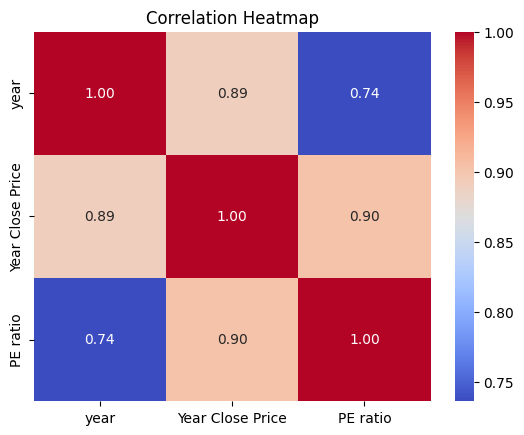

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
df.columns.to_list()

['year',
 'EBITDA (millions)',
 'Revenue (millions)',
 'Gross Profit (millions)',
 'Op Income (millions)',
 'Net Income (millions)',
 'EPS',
 'Shares Outstanding',
 'Year Close Price',
 'Total Assets (millions)',
 'Cash on Hand (millions)',
 'Long Term Debt (millions)',
 'Total Liabilities (millions)',
 'Gross Margin',
 'PE ratio',
 'Employees']

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

year                            0
EBITDA (millions)               0
Revenue (millions)              0
Gross Profit (millions)         0
Op Income (millions)            0
Net Income (millions)           0
EPS                             0
Shares Outstanding              0
Year Close Price                0
Total Assets (millions)         0
Cash on Hand (millions)         0
Long Term Debt (millions)       0
Total Liabilities (millions)    0
Gross Margin                    0
PE ratio                        0
Employees                       0
dtype: int64

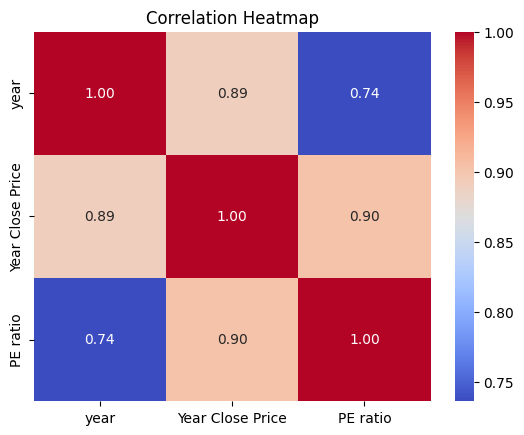

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

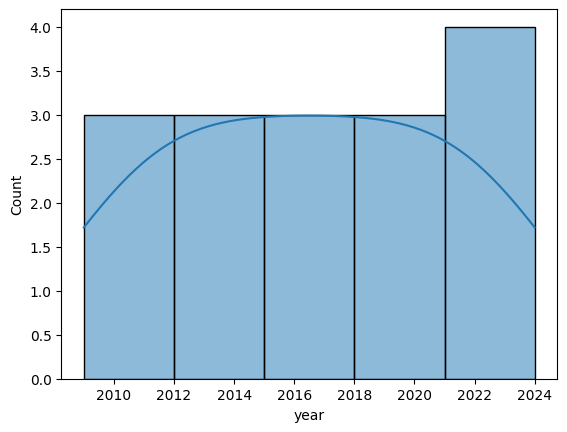

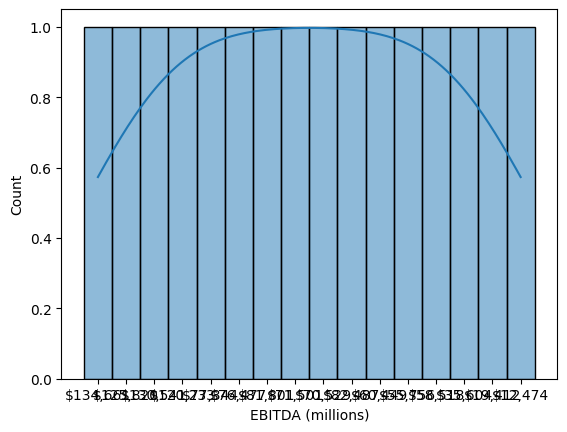

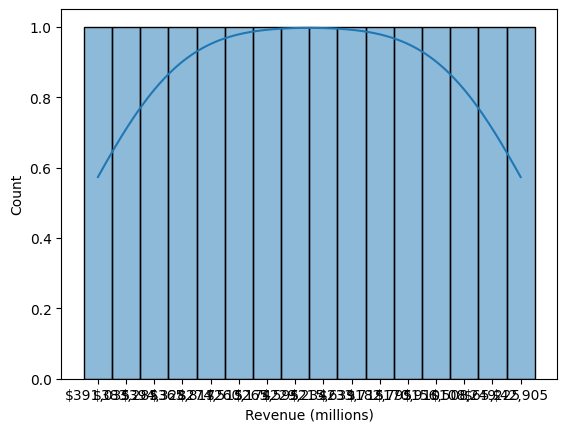

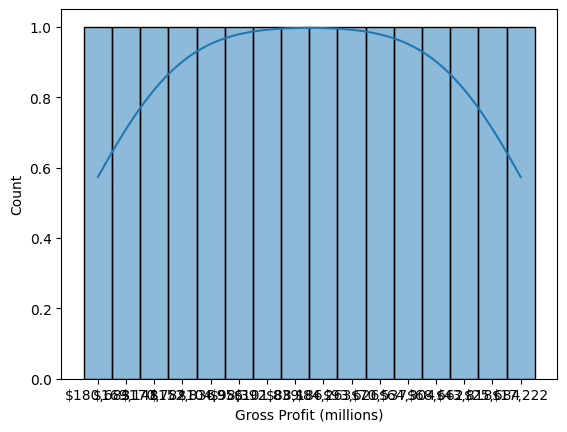

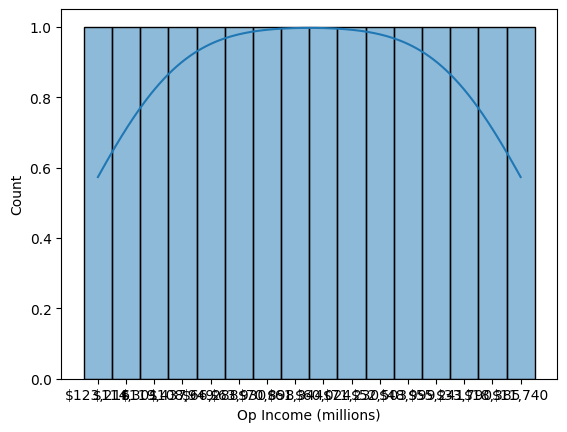

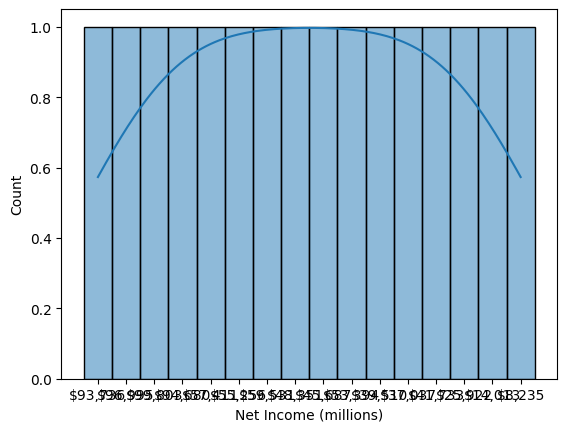

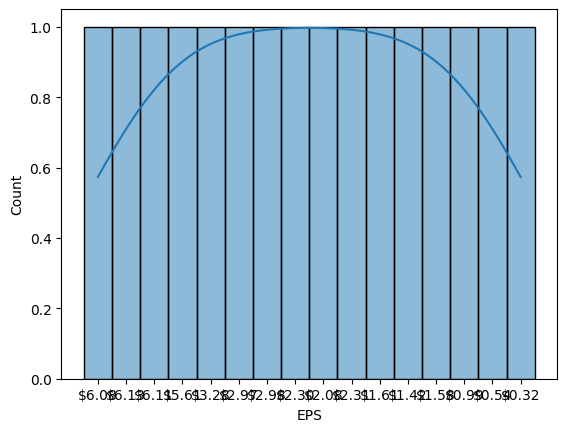

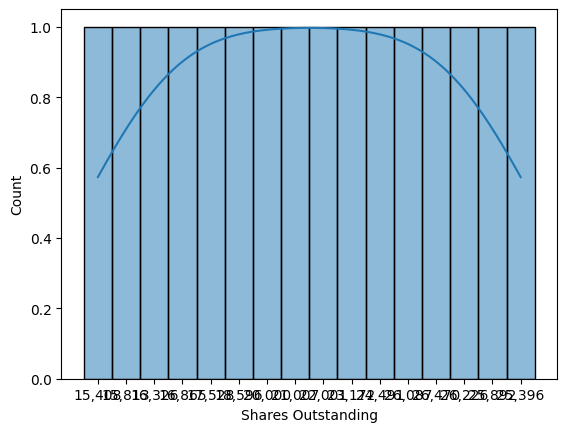

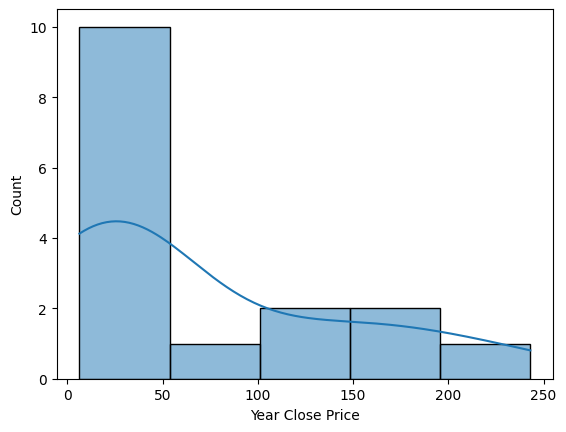

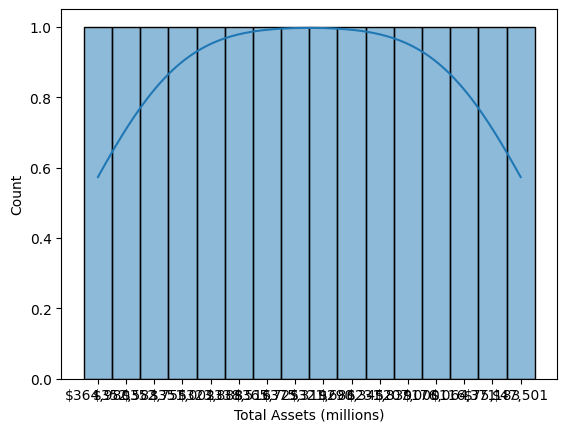

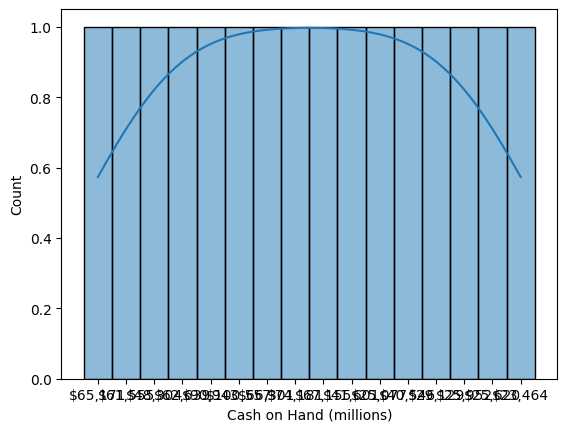

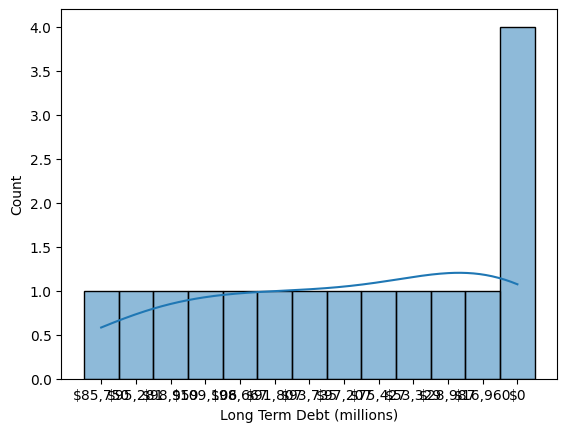

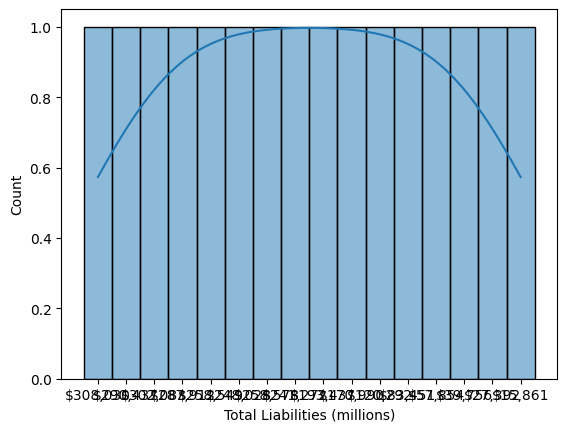

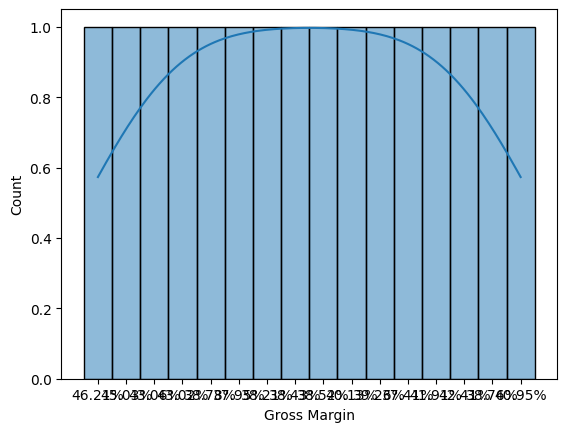

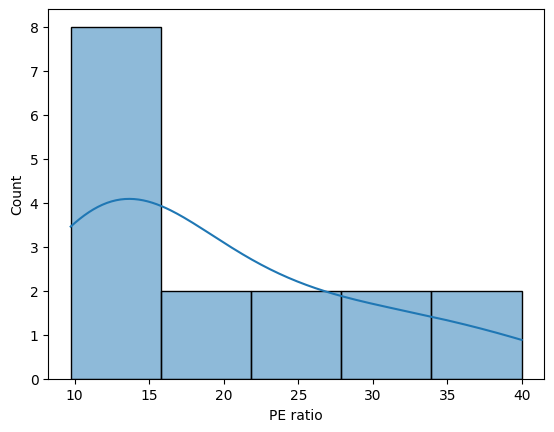

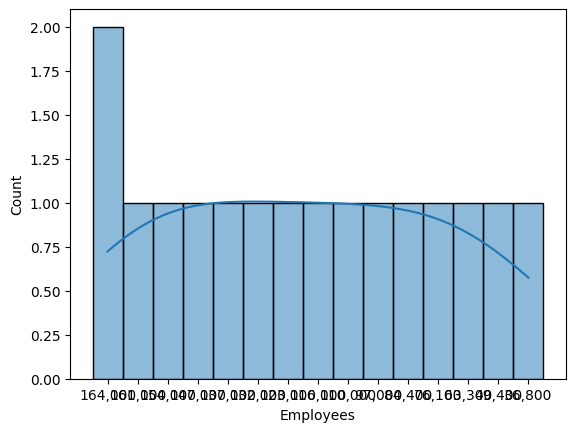

In [11]:
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

In [12]:
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns =['year',
 'EBITDA (millions)',
 'Revenue (millions)',
 'Gross Profit (millions)',
 'Op Income (millions)',
 'Net Income (millions)',
 'EPS',
 'Shares Outstanding',
 'Year Close Price',
 'Total Assets (millions)',
 'Cash on Hand (millions)',
 'Long Term Debt (millions)',
 'Total Liabilities (millions)',
 'Gross Margin',
 'PE ratio',
 'Employees']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue
        
        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )
            
            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )
            
            # Show the figure
            fig.show()
    
    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")